Regression on benchmark dataset

## BSE Stock

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df_stock = pd.read_csv('bse_stock.csv')
df_stock.head()

,Date,Open,High,Low,Close
0,01/01/2009,9720.55,9921.70,9711.64,9903.46
1,02/01/2009,9973.06,10070.28,9863.86,9958.22
2,05/01/2009,10109.67,10306.17,10069.11,10275.60
3,06/01/2009,10258.38,10392.12,10150.68,10335.93
4,07/01/2009,10424.96,10469.72,9510.15,9586.88


In [ ]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2557 non-null   object 
 1   Open    2557 non-null   float64
 2   High    2557 non-null   float64
 3   Low     2557 non-null   float64
 4   Close   2557 non-null   float64
dtypes: float64(4), object(1)
memory usage: 100.0+ KB


In [ ]:
df_stock.describe()

,Open,High,Low,Close
count,2557.000000,2557.000000,2557.000000,2557.000000
mean,23625.847000,23748.206347,23467.204145,23603.610508
std,7084.787107,7084.036961,7061.712640,7069.469155
min,8103.750000,8259.220000,8047.170000,8160.400000
25%,17827.250000,17948.540000,17694.830000,17823.400000
50%,21237.960000,21304.700000,21133.820000,21209.730000
75%,28298.350000,28404.700000,28138.300000,28243.290000
max,39420.040000,39487.450000,39083.160000,39275.640000


In [ ]:
df_stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
df_stock.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

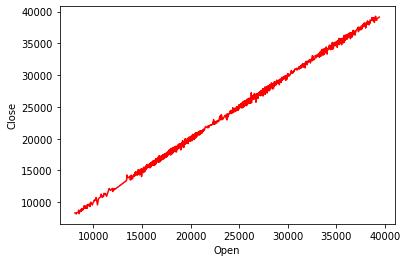

In [ ]:
sns.lineplot(df_stock["Open"],df_stock["Close"],data=df_stock,color="r")

In [ ]:
#feature correlation
df1=df_stock[["Open","High","Low"]]
df1.corr()

,Open,High,Low
Open,1.000000,0.999863,0.999789
High,0.999863,1.000000,0.999801
Low,0.999789,0.999801,1.000000


In [ ]:
X=df_stock["Open"].values.reshape(-1,1)
y=df_stock["Close"]

In [ ]:
#train test and split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=lreg.predict(X_test)
y_pred

array([26703.55821426, 18364.0383232 , 33708.0234078 , 17162.1967688 ,
       36372.33615545,  9326.73577656, 26700.78460328, 17705.72475048,
       24803.13584286, 10432.81791306, 23786.51762596, 31258.30633838,
       25726.54875846, 27448.53216455, 19197.92745709, 21521.75451454,
       19856.15123665, 27701.20014311, 19483.26019229, 22393.10735068,
       17370.55681083, 28510.49592785, 21276.45955221, 17171.97424635,
       27222.52277784, 17906.24285642, 28183.06017708, 17386.52003948,
       32213.67564234, 20984.1528815 , 17414.28608032, 21800.86159055,
       35158.09316779, 27738.78356957, 26390.62904753, 18217.08682641,
       18070.55436437, 34935.00704733, 20149.32590792, 17766.04580076,
       27945.94636944, 25538.25249945, 17650.60172653, 25401.7968255 ,
       35648.20419557, 26631.25476547, 20520.52085925, 19189.5766931 ,
       28986.18018774,  8595.15098431, 33941.25615547, 16415.27730003,
       16182.27402377, 18232.14214644, 30247.82398749,  9034.1198183 ,
      

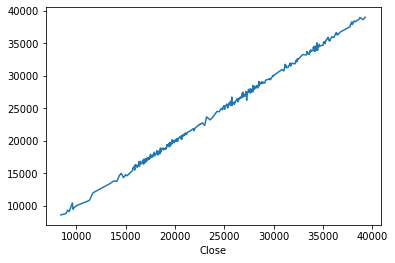

In [ ]:
sns.lineplot(y_test,y_pred)

In [ ]:
lreg.score(X_test,y_test)  #this High score suspects overfitting of data

0.9990372652001522

## Adult Dataset

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

In [ ]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.shape

(48842, 15)

In [ ]:
attrib, counts = np.unique(df['workclass'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df['workclass'][df['workclass'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(df['occupation'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df['occupation'][df['occupation'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(df['native-country'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
df['native-country'][df['native-country'] == '?'] = most_freq_attrib

In [ ]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [ ]:
# make the age variable discretized 
df['age_bin'] = pd.cut(df['age'], 20)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df = df.apply(LabelEncoder().fit_transform)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_bin
0,8,3,19329,1,6,4,6,3,2,1,0,0,39,38,0,2
1,21,3,4212,11,8,2,4,0,4,1,0,0,49,38,0,5
2,11,1,25340,7,11,2,10,0,4,1,0,0,39,38,1,3
3,27,3,11201,15,9,2,6,0,2,1,98,0,39,38,1,7
4,1,3,5411,15,9,4,9,3,4,0,0,0,29,38,0,0


In [ ]:
df['predclass'] = df['income']
del df['income']
df['education-num'] = df['educational-num']
del df['educational-num']

In [ ]:
drop_elements = ['education', 'native-country', 'predclass', 'age_bin']
y = df["predclass"]
X = df.drop(drop_elements, axis=1)
X.head()

,age,workclass,fnlwgt,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,education-num
0,8,3,19329,4,6,3,2,1,0,0,39,6
1,21,3,4212,2,4,0,4,1,0,0,49,8
2,11,1,25340,2,10,0,4,1,0,0,39,11
3,27,3,11201,2,6,0,2,1,98,0,39,9
4,1,3,5411,4,9,3,4,0,0,0,29,9


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LogisticRegression #logistic regression
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.7986487869792199
